<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Import Dataset

In [3]:
labels = ['Bags','Belts','Boots','Dresses','Hats','Jackets & Coats','Jewelry','Knitwear','Loafers',
 'Pants','Sandals','Scarves','Skirt','Sneakers','Sunglasses','T-Shirts']

X = []
y_train = []

image_size = 250 

# All Data
for i in labels:
    folderPath = os.path.join(r"C:\Users\Zagreus\Documents\DUMMY\Dokumen Pribadi\College\Data Mining II\12.1. Scrap Fashion\Dataset",i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size,image_size))
        except:
            print(i, j)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        X.append(img)
        y_train.append(i)
print('Data train DONE!')

X = np.array(X)
y_train = np.array(y_train)

100%|██████████| 677/677 [00:10<00:00, 61.58it/s] 


Data train DONE!


In [4]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(X, y_train, train_size=0.8, random_state=42)

In [5]:
X_train = x_train.astype('float32') #set x_train data type as float32
X_test = x_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new.copy()
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new.copy()
y_test = tf.keras.utils.to_categorical(y_test)

# Model Predict

In [7]:
model = keras.models.load_model('12.1. best_model Inception.h5')

29/29 [==============================] - 18s 263ms/step


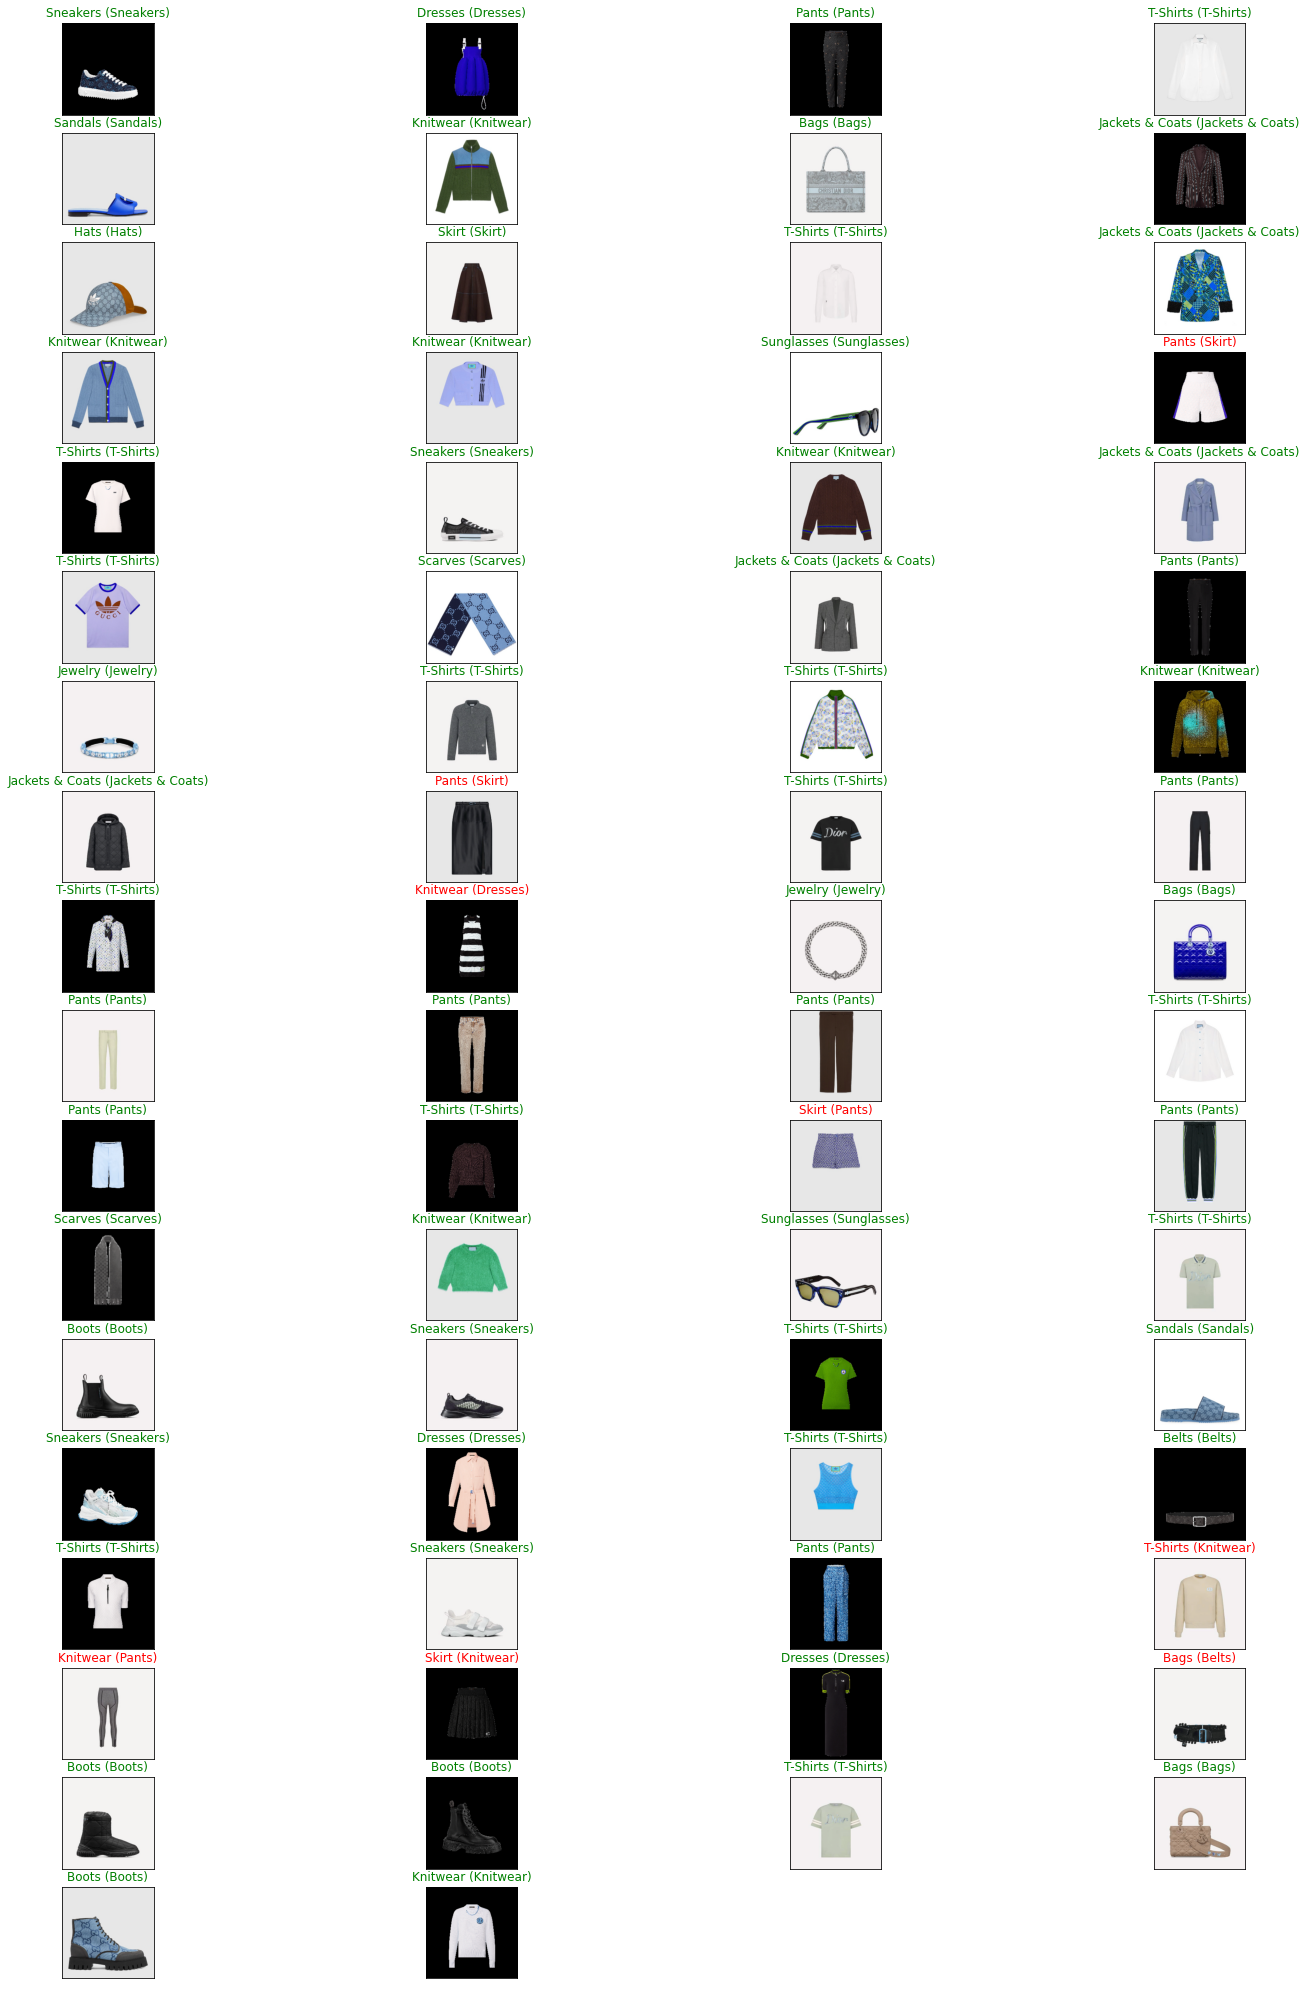

In [8]:
y_hat = model.predict(X_test)
# Plot a random sample of 54 test images, their predicted labels and ground truth
figure = plt.figure(figsize= (25, 40))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=70, replace=False)): # size (jumlah total data uji)
    ax = figure.add_subplot(20, 4, i + 1, xticks=[], yticks=[]) #ukuran 10 X 7 untuk visualisasi gambar pada heatmap confusion matrix
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

1/1 [==============================] - 0s 29ms/step


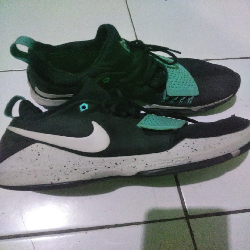

Label : Sneakers


In [12]:
# load an image from file
image = load_img('Sepatu Nike.jpg', target_size=(250, 250))
# convert the image pixels to a numpy array
image_pixels = img_to_array(image)
# reshape data for the model
image_reshape = image_pixels.reshape((1, image_pixels.shape[0], image_pixels.shape[1], image_pixels.shape[2]))
# prepare the image for the VGG model
image_preprocess = preprocess_input(image_reshape)
# predict the probability across all output classes
yhat = model.predict(image_preprocess)
index = np.argmax(yhat)
result = labels[index]
display(image)
print('Label :', result)